# KNN
K近邻算法  
计算待标记的数据样本和数据集中每个样本的距离，取其距离最近的K个样本。  
那么待标记的数据样本所属于的类别，就由这K个距离最近的样本投票产生。
为了避免平局，K通常选择奇数

优点：准确性高，对异常值有较高的容忍度  
缺点：计算量大，对一个未标记的样本进行分类时，需要全部计算一边距离

如果k值越大，模型的偏差越大，对噪声数据越不敏感，k值太小，就会造成模型过拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


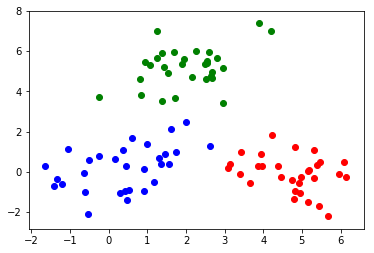

In [2]:
size = 30
x1 = np.random.multivariate_normal([0,0], [[0.7, 1], [1, 0.1]], size)
x2 = np.random.multivariate_normal([2,5], [[0.7,1], [1, 0.1]], size)
x3 = np.random.multivariate_normal([5,0], [[1, 0.1], [0.1, 1]], size)
color = ['b','g','r']

plt.scatter(x1[:,0],x1[:,1],c=color[0])
plt.scatter(x2[:,0],x2[:,1],c=color[1])
plt.scatter(x3[:,0],x3[:,1],c=color[2])

In [3]:
X = np.vstack((np.vstack((x1,x2)),x3))
y = np.hstack((np.hstack((np.zeros(x1.shape[0]),np.ones(x2.shape[0]))),np.ones(x3.shape[0])*2)).reshape(-1,1)

In [4]:
x_sample = np.random.randint(-2, 8, (5,2))
# x_sample = [[0, 2]]

In [5]:
# 欧式距离
def dist(a, b, ax=1):
        return np.linalg.norm(a-b, axis=ax) # 距离范数
    
    
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3):
        self.k = n_neighbors
        self.X_train = X_train
        self.y_train = y_train
    
    def dist(a, b, ax=1):
        print(a.shape)
        return np.linalg.norm(a-b, axis=ax) # 距离范数
    
    def predict(self, X_test):
        ner_arr = []
        y_pred = []
        for x in X_test:
            distance = dist(self.X_train, x)
            a = sorted(range(len(self.X_train)),key=lambda x:distance[x]) # 离样本点最近的点的下标，排序
            ner_arr.append(a[:self.k]) 
            y_k = []
            for i in a[:self.k]:
                y_k.append(y[i][0]) # 最近点的标签
            b=np.argmax(np.bincount(y_k)) # 出现次数最多的标签
            y_pred.append(b)

        return np.array(ner_arr), np.array(y_pred)
    
    def score(self, y_pred, y_test):
        acc = (y_pred == y_test).sum() / len(X_test)
        print(acc)
        

knn = KNN(X, y, 5)
neighbors, y_pred = knn.predict(x_sample)
neighbors

array([[24,  0, 21,  5, 10],
       [52, 75, 71,  3, 69],
       [27, 22, 28,  2,  4],
       [26, 17, 19,  1, 15],
       [40, 32, 38, 56, 35]])

x_sample 属于：
[0 2 0 0 1]


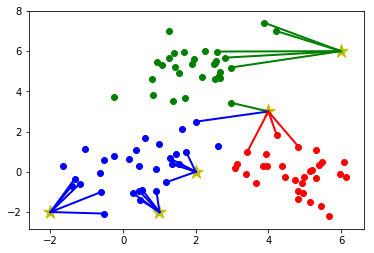

In [6]:
plt.scatter(x1[:,0],x1[:,1],c=color[0])
plt.scatter(x2[:,0],x2[:,1],c=color[1])
plt.scatter(x3[:,0],x3[:,1],c=color[2])
for i in range(len(x_sample)):
    plt.scatter(x_sample[i][0], x_sample[i][1], marker='*',c='y',s=200)
    for j in neighbors[i]:
        plt.plot([X[j][0],x_sample[i][0]],[X[j][1],x_sample[i][1]], color=color[int(y[j][0])],linewidth=2)
print('x_sample 属于：')
print(y_pred)

In [7]:
# sklearn
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X,y)
neighbors = clf.kneighbors(x_sample, return_distance=False)
neighbors

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[24,  0, 21,  5, 10],
       [52, 75, 71,  3, 69],
       [27, 22, 28,  2,  4],
       [26, 17, 19,  1, 15],
       [40, 32, 38, 56, 35]], dtype=int64)

x_sample 属于：
[0. 2. 0. 0. 1.]


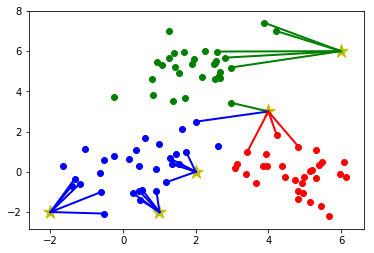

In [8]:
plt.scatter(x1[:,0],x1[:,1],c=color[0])
plt.scatter(x2[:,0],x2[:,1],c=color[1])
plt.scatter(x3[:,0],x3[:,1],c=color[2])
for i in range(len(x_sample)):
    plt.scatter(x_sample[i][0], x_sample[i][1], marker='*',c='y',s=200)
    for j in neighbors[i]:
        plt.plot([X[j][0],x_sample[i][0]],[X[j][1],x_sample[i][1]],[[1,5]], color=color[int(y[j][0])],linewidth=2)
print('x_sample 属于：')
print(clf.predict(x_sample))